# Fontes de consulta

In [2]:
# https://docs.aws.amazon.com/wellarchitected/latest/machine-learning-lens/machine-learning-lens.html

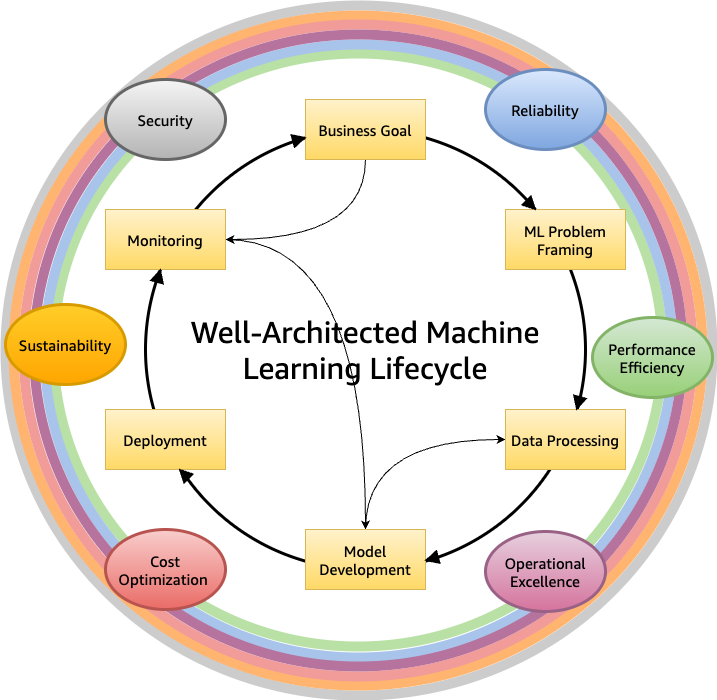

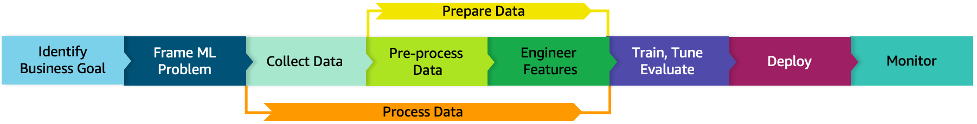

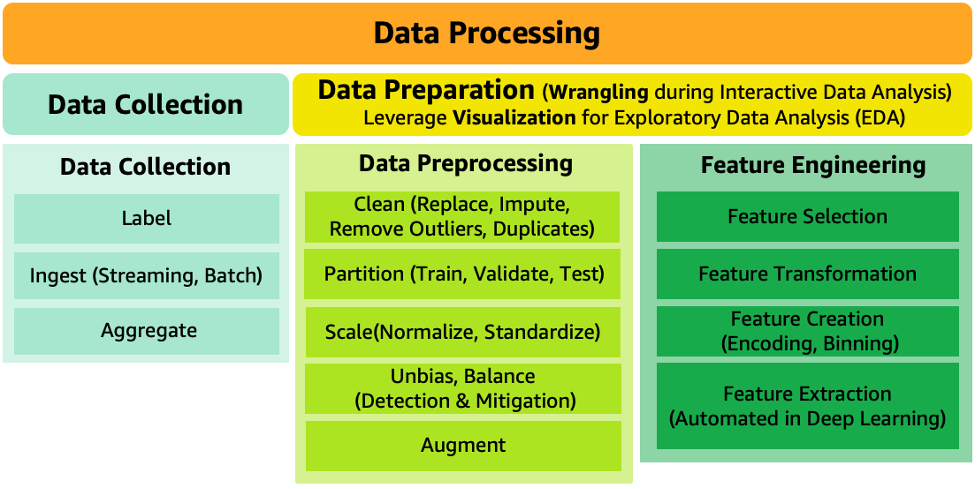

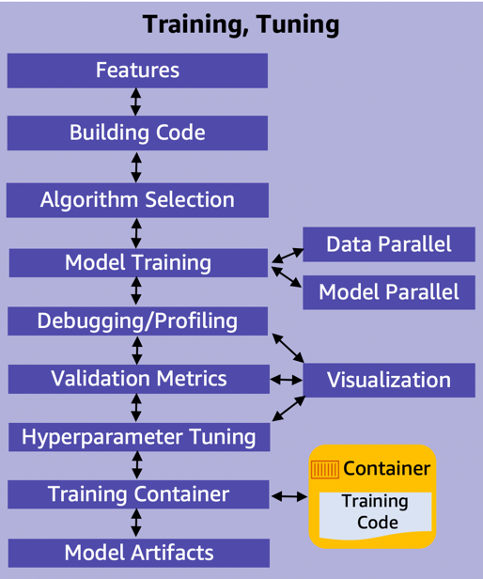

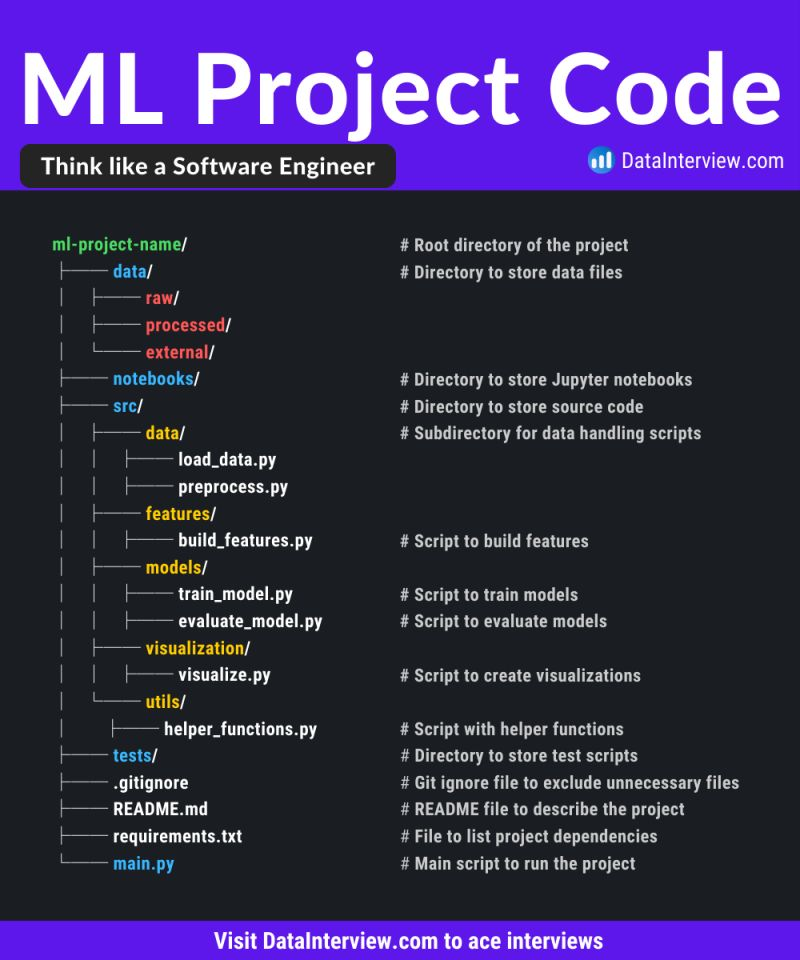

In [3]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/whatis.html

# https://docs.aws.amazon.com/wellarchitected/latest/machine-learning-lens/machine-learning-lens.html

# https://python.plainenglish.io/how-i-automated-data-cleaning-in-python-using-functions-and-pipelines-95b8ad0f6ea5

# Packges and configurations

In [81]:
# Padrão
import pandas as pd 
import numpy as np 

# Light GBM
import lightgbm as lgb

# Visualization
import squarify
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly
import seaborn as sns
sns.set_style('darkgrid')

# Others
import openpyxl
import xlrd
import os
import statistics
from math import isnan
import tqdm
import hashlib

# Metrics from Sklearn
from sklearn import set_config
from sklearn import metrics
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             precision_score, 
                             recall_score, 
                             confusion_matrix, 
                             auc,
                             roc_curve, 
                             roc_auc_score, 
                             f1_score, 
                             auc)
from sklearn.pipeline import make_pipeline

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce



In [3]:
# LOFO
from tqdm.autonotebook import tqdm
from lofo import LOFOImportance, Dataset, plot_importance

C:\Users\luand\AppData\Local\Temp\ipykernel_26252\1445486969.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = FutureWarning) 
warnings.filterwarnings("ignore", category = UserWarning) 

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Import dataframe

In [6]:
name_file_df = 'bank-full-case.csv'
df_teste = pd.read_csv(name_file_df, sep=";", encoding='UTF-8', low_memory=False)
df_teste = df_teste.reset_index()
df_teste = df_teste.rename(columns={'index': 'ID'})
df_teste.shape

(45211, 18)

# Data Preparation

## Read the Dataframe

In [7]:
df_teste.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         45211 non-null  int64 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [9]:
def unique_values(df):
    all_cols = df.columns
    feature_name = []
    num_unique_val = []
    name_unique_val = []
    datatype = []
    
    for col in all_cols:
        feature_name.append(col)
        num_unique_val.append(df[col].nunique())
        name_unique_val.append(df[col].unique())
        datatype.append(df[col].dtype)
    return pd.DataFrame({'Feature Name': feature_name, 'Number of Unique Value': num_unique_val, 'Name of Unique Values': name_unique_val,'datatype': datatype})

In [10]:
unique_values(df_teste)

,Feature Name,Number of Unique Value,Name of Unique Values,datatype
0,ID,45211,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",int64
1,age,77,"[58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...",int64
2,job,12,"[management, technician, entrepreneur, blue-co...",object
3,marital,3,"[married, single, divorced]",object
4,education,4,"[tertiary, secondary, unknown, primary]",object
5,default,2,"[no, yes]",object
6,balance,7168,"[2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...",int64
7,housing,2,"[yes, no]",object
8,loan,2,"[no, yes]",object
9,contact,3,"[unknown, cellular, telephone]",object


In [11]:
df_teste.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
feature_object = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']   
for  Names in feature_object:  
    print(df_teste[Names].value_counts())

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
default
no     44396
yes      815
Name: count, dtype: int64
housing
yes    25130
no     20081
Name: count, dtype: int64
loan
no     37967
yes     7244
Name: count, dtype: int64
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64
poutcome
unknown    36959
failure     4901
other  

## EDA

*****************************************************************
************************ job ************************


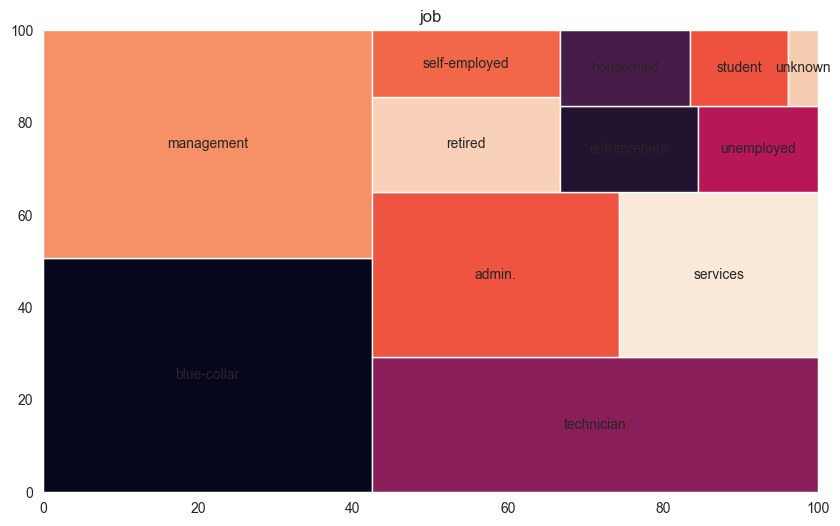

              job    ID  Part_PCT
1     blue-collar  9732    21.526
4      management  9458    20.920
9      technician  7597    16.803
0          admin.  5171    11.437
7        services  4154     9.188
5         retired  2264     5.008
6   self-employed  1579     3.493
2    entrepreneur  1487     3.289
10     unemployed  1303     2.882
3       housemaid  1240     2.743
8         student   938     2.075
11        unknown   288     0.637
*****************************************************************
*****************************************************************
************************ marital ************************


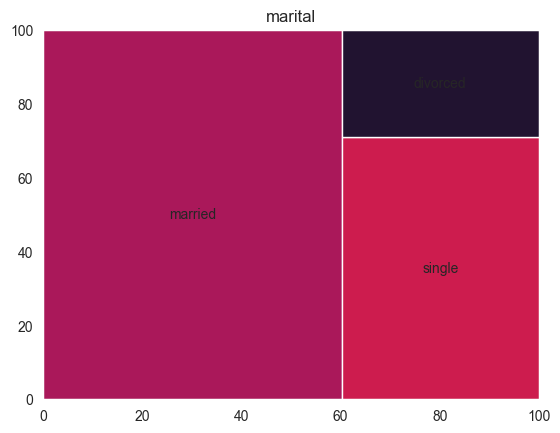

    marital     ID  Part_PCT
1   married  27214    60.193
2    single  12790    28.290
0  divorced   5207    11.517
*****************************************************************
*****************************************************************
************************ education ************************


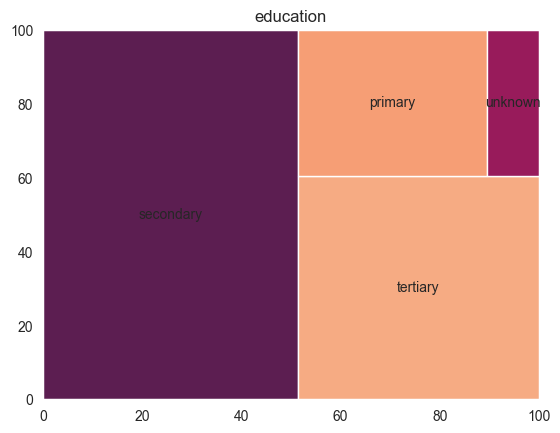

   education     ID  Part_PCT
1  secondary  23202    51.319
2   tertiary  13301    29.420
0    primary   6851    15.153
3    unknown   1857     4.107
*****************************************************************
*****************************************************************
************************ default ************************


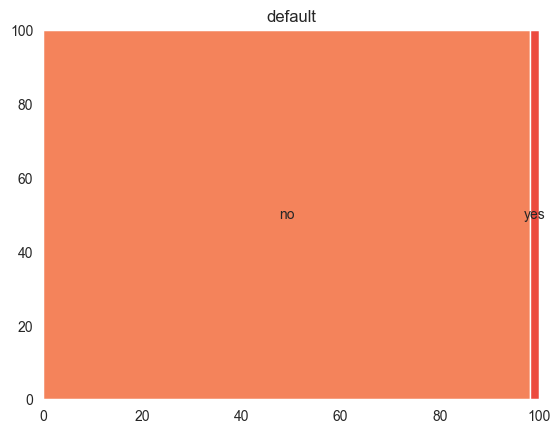

  default     ID  Part_PCT
0      no  44396    98.197
1     yes    815     1.803
*****************************************************************
*****************************************************************
************************ housing ************************


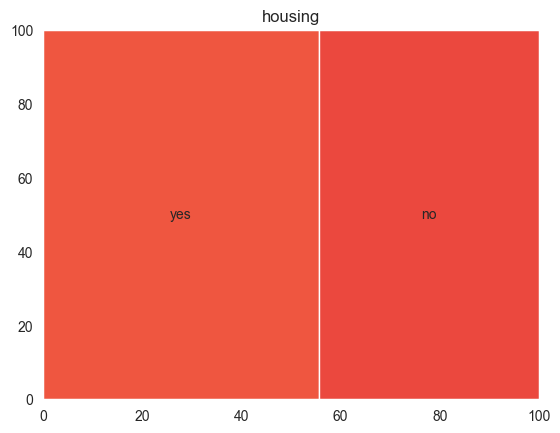

  housing     ID  Part_PCT
1     yes  25130    55.584
0      no  20081    44.416
*****************************************************************
*****************************************************************
************************ loan ************************


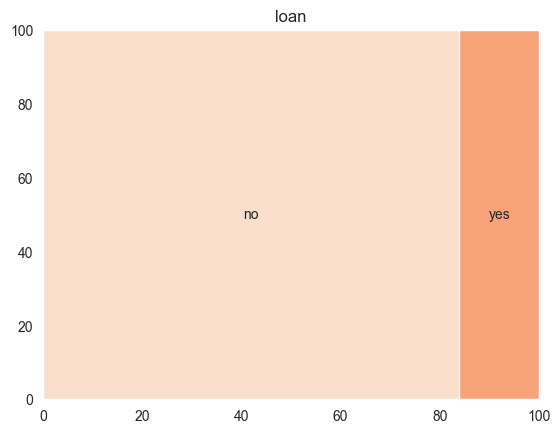

  loan     ID  Part_PCT
0   no  37967    83.977
1  yes   7244    16.023
*****************************************************************
*****************************************************************
************************ contact ************************


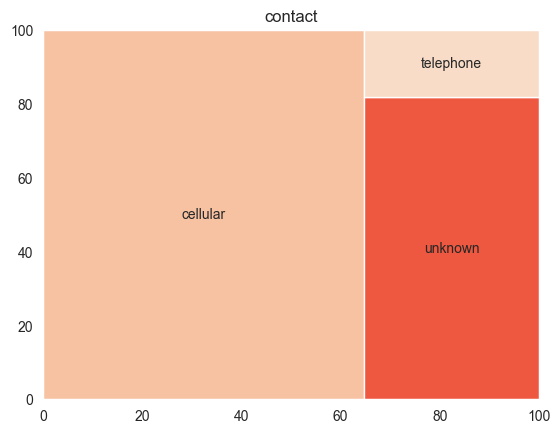

     contact     ID  Part_PCT
0   cellular  29285    64.774
2    unknown  13020    28.798
1  telephone   2906     6.428
*****************************************************************
*****************************************************************
************************ month ************************


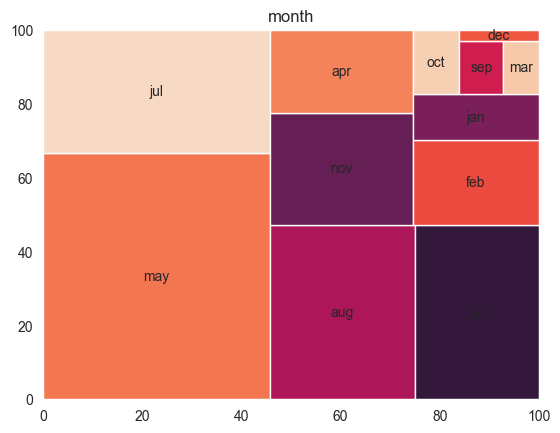

   month     ID  Part_PCT
8    may  13766    30.448
5    jul   6895    15.251
1    aug   6247    13.817
6    jun   5341    11.813
9    nov   3970     8.781
0    apr   2932     6.485
3    feb   2649     5.859
4    jan   1403     3.103
10   oct    738     1.632
11   sep    579     1.281
7    mar    477     1.055
2    dec    214     0.473
*****************************************************************
*****************************************************************
************************ poutcome ************************


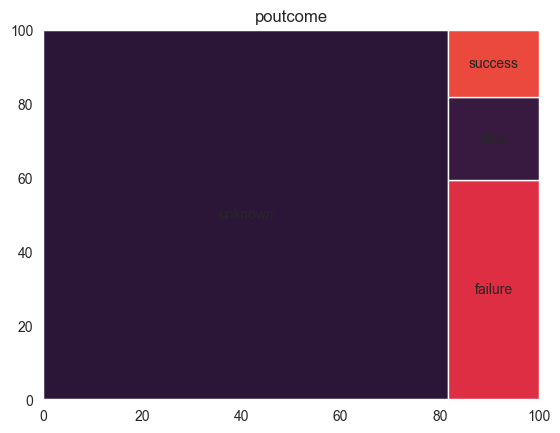

  poutcome     ID  Part_PCT
3  unknown  36959    81.748
0  failure   4901    10.840
1    other   1840     4.070
2  success   1511     3.342
*****************************************************************
*****************************************************************
************************ y ************************


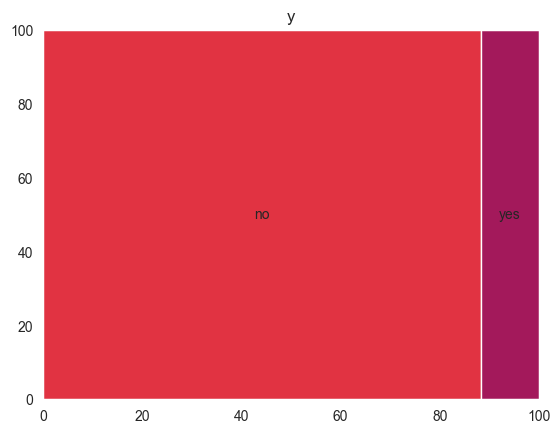

     y     ID  Part_PCT
0   no  39922    88.302
1  yes   5289    11.698
*****************************************************************


In [13]:
plt.figure(figsize=(10, 6))

for Names in feature_object: 
    grouped_ = df_teste.groupby(Names)['ID'].count().reset_index()
    for i in range(0, len(grouped_)):
        grouped_.loc[i, 'Part_PCT'] = (grouped_.loc[i, 'ID'] / grouped_['ID'].sum()) * 100
    grouped_.sort_values(by = ['ID'], ascending = False, inplace = True)

    squarify.plot(sizes=grouped_['ID'], label=grouped_[Names])
    print("*****************************************************************")
    print("************************ " + Names + " ************************")
    plt.title(Names)
    plt.show()

    print(grouped_)
    print("*****************************************************************")

In [14]:
feature_int = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
feature_int_columns = []
feature_int_compare = pd.DataFrame(columns = feature_int_columns)

row_index = 0
for name in feature_int:
    feature_int_compare.loc[row_index,'Variável'] = name
    feature_int_compare.loc[row_index, 'N'] = df_teste[name].count()
    feature_int_compare.loc[row_index, 'Min'] = df_teste[name].min()
    feature_int_compare.loc[row_index, 'Max'] = df_teste[name].max()
    feature_int_compare.loc[row_index, 'Média'] = df_teste[name].mean()
    feature_int_compare.loc[row_index, 'Mediana'] = df_teste[name].median()
    feature_int_compare.loc[row_index, 'Desvio Padrão'] = df_teste[name].std()
    feature_int_compare.loc[row_index, 'Count 0'] = (df_teste[name] == 0).sum()
    row_index+=1

feature_int_compare.sort_values(by = ['Variável'], ascending = True, inplace = True)
round(feature_int_compare, 2)
    

,Variável,N,Min,Max,Média,Mediana,Desvio Padrão,Count 0
0,age,45211.000,18.000,95.000,40.940,39.000,10.620,0.000
1,balance,45211.000,-8019.000,102127.000,1362.270,448.000,3044.770,3514.000
3,campaign,45211.000,1.000,63.000,2.760,2.000,3.100,0.000
2,duration,45211.000,0.000,4918.000,258.160,180.000,257.530,3.000
4,pdays,45211.000,-1.000,871.000,40.200,-1.000,100.130,0.000
5,previous,45211.000,0.000,275.000,0.580,0.000,2.300,36954.000


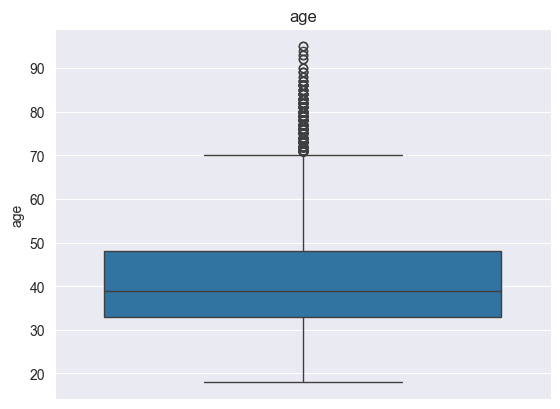

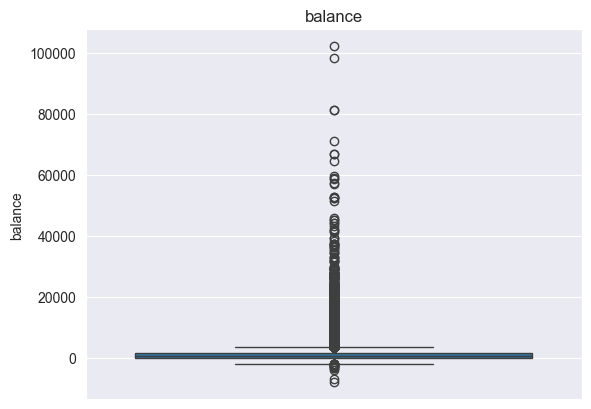

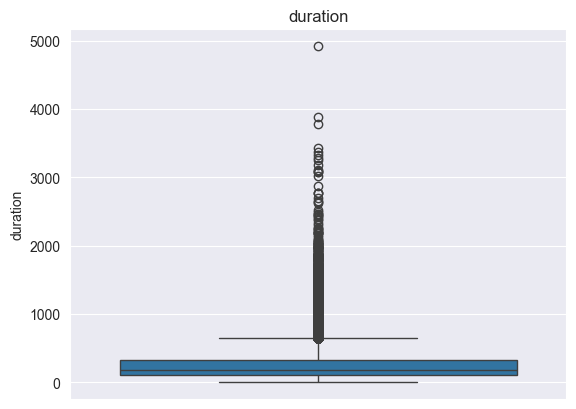

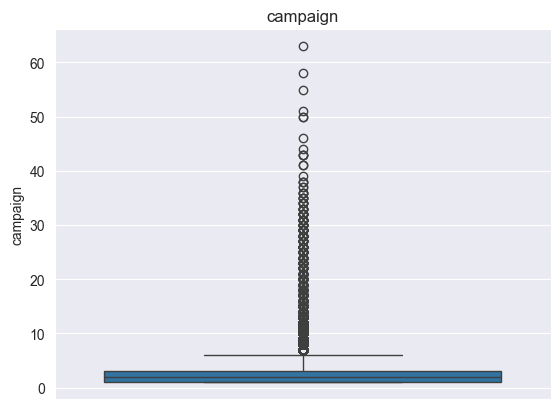

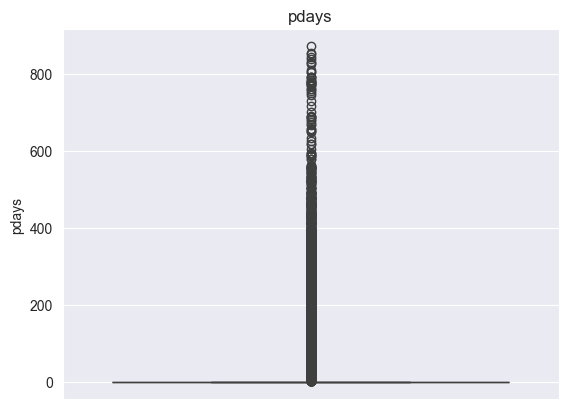

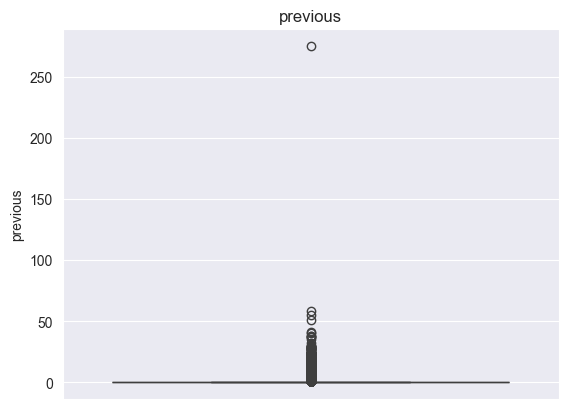

In [15]:
for name in feature_int:
    sns.boxplot(data=df_teste, y=name)
    plt.title(name)
    plt.show()

## Clean (replace, impute, remove outliers and duplicates) 

In [16]:
df_teste.shape

(45211, 18)

In [17]:
df_copied = df_teste.copy()
df_copied.shape

(45211, 18)

In [18]:
# Define uma função para filtrar uma coluna abaixo de um valor
def filter_minor(df_, col_, value_):
    df_ = df_[(df_[col_] < value_)]
    return df_

### Variável 'balance'

In [19]:
df_copied = filter_minor(df_copied, 'balance', 80000)
df_copied.shape

(45207, 18)

In [20]:
len(df_copied[df_copied['balance'] < 0])

3766

### Variável 'duration'

In [21]:
df_teste['duration'].quantile(np.linspace(.1, 1, 9, 0))

0.100    58.000
0.200    89.000
0.300   117.000
0.400   147.000
0.500   180.000
0.600   223.000
0.700   280.000
0.800   368.000
0.900   548.000
Name: duration, dtype: float64

In [22]:
df_copied = filter_minor(df_copied, 'duration', 3000)
df_copied.shape

(45193, 18)

In [23]:
len(df_copied[df_copied['duration'] < 0])

0

### Variável 'pdays'

In [24]:
df_copied['pdays'].value_counts()

pdays
-1      36938
 182      167
 92       147
 91       126
 183      126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        71
 175       71
 185       68
 93        65
 343       65
 188       64
 186       60
 189       60
 174       57
 349       57
 96        57
 363       55
 90        54
 97        54
 196       51
 365       51
 368       49
 357       49
 98        49
 342       49
 345       48
 351       48
 178       47
 367       47
 347       47
 190       46
 195       45
 356       45
 104       45
 99        45
 180       45
 172       44
 371       44
 344       44
 150       43
 170       43
 87        43
 179       43
 187       43
 169       42
 176       42
 105       42
 167       42
 352       40
 355       40
 360       38
 168       37
 2         37
 272       37
 336       36
 359       36
 358       35
 346       35
 265       35
 102       35
 173       34
 171       34
 361       33
 252       33
 330       33


In [25]:
df_1 = df_copied[['ID', 'pdays']]
df_1 = df_1[df_1['pdays'] >= 0]
h = pd.DataFrame([round(q, 3) for q in statistics.quantiles(df_1['pdays'], n = 9)])
df_1['New_pdays'] = np.where(df_1['pdays'] >= h.loc[7, 0], 10,
                    np.where(df_1['pdays'] >= h.loc[6, 0], 9,
                    np.where(df_1['pdays'] >= h.loc[5, 0], 8,
                    np.where(df_1['pdays'] >= h.loc[4, 0], 7,
                    np.where(df_1['pdays'] >= h.loc[3, 0], 6,
                    np.where(df_1['pdays'] >= h.loc[2, 0], 5,
                    np.where(df_1['pdays'] >= h.loc[1, 0], 4,
                    np.where(df_1['pdays'] >= h.loc[0, 0], 3, 2))))))))
df_1 = df_1.iloc[:,[0, 2]]
df_1.iloc[:,1] = df_1.iloc[:,1].astype(int)
df_copied = df_copied.merge(df_1, on=['ID'], how='left')
df_copied = df_copied.fillna(1)
df_copied.shape

(45193, 19)

In [26]:
df_copied['New_pdays'].value_counts()

New_pdays
1.000     36938
3.000       980
6.000       977
9.000       933
10.000      926
4.000       924
7.000       907
8.000       905
5.000       859
2.000       844
Name: count, dtype: int64

### Variável 'previous'

In [27]:
len(df_copied[df_copied['previous'] > 50])

4

In [28]:
df_copied = filter_minor(df_copied, 'previous', 50)
df_copied.shape

(45189, 19)

### Check 1

In [29]:
feature_int = ['age', 'balance', 'duration', 'campaign', 'pdays', 'New_pdays', 'previous']
feature_int_columns = []
feature_int_compare = pd.DataFrame(columns = feature_int_columns)

row_index = 0
for name in feature_int:
    feature_int_compare.loc[row_index,'Variável'] = name
    feature_int_compare.loc[row_index, 'N'] = df_copied[name].count()
    feature_int_compare.loc[row_index, 'Min'] = df_copied[name].min()
    feature_int_compare.loc[row_index, 'Max'] = df_copied[name].max()
    feature_int_compare.loc[row_index, 'Média'] = df_copied[name].mean()
    feature_int_compare.loc[row_index, 'Mediana'] = df_copied[name].median()
    feature_int_compare.loc[row_index, 'Desvio Padrão'] = df_copied[name].std()
    feature_int_compare.loc[row_index, 'Count 0'] = (df_copied[name] == 0).sum()
    row_index+=1

feature_int_compare.sort_values(by = ['Variável'], ascending = True, inplace = True)
round(feature_int_compare, 2)

,Variável,N,Min,Max,Média,Mediana,Desvio Padrão,Count 0
5,New_pdays,45189.000,1.000,10.000,1.920,1.000,2.230,0.000
0,age,45189.000,18.000,95.000,40.930,39.000,10.620,0.000
1,balance,45189.000,-8019.000,71188.000,1354.580,448.000,2925.540,3513.000
3,campaign,45189.000,1.000,63.000,2.760,2.000,3.100,0.000
2,duration,45189.000,0.000,2870.000,257.170,180.000,251.370,3.000
4,pdays,45189.000,-1.000,871.000,40.170,-1.000,100.060,0.000
6,previous,45189.000,0.000,41.000,0.570,0.000,1.860,36938.000


### Replace 0-1

In [30]:
# Convert string into interger - 0/1

feature_object = ['default', 'housing', 'loan', 'y']  
def binary_map(feature):
    return feature.map({'yes':1, 'no':0})

for  Names in feature_object:  
    df_copied[Names] = df_copied[[Names]].apply(binary_map)

In [31]:
df_copied.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,New_pdays
0,0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,1.000
1,1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,1.000
2,2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,1.000
3,3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,1.000
4,4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,1.000


## Feature creation

### one-hot-encoding

In [32]:
# categorical columns without an order :

a = unique_values(df_copied)
a = a[(a['datatype'] == 'object')]
nominal_columns = a['Feature Name'].tolist()
nominal_columns

['job', 'marital', 'education', 'contact', 'month', 'poutcome']

In [36]:
nominal_columns.remove("month")
nominal_columns

['job', 'marital', 'education', 'contact', 'poutcome']

In [37]:
nominal_columns_new = nominal_columns.copy()
for i in range(0, len(nominal_columns_new)):
    nominal_columns_new[i] = nominal_columns_new[i] + "_targetencoder_"

nominal_columns_new    

['job_targetencoder_',
 'marital_targetencoder_',
 'education_targetencoder_',
 'contact_targetencoder_',
 'poutcome_targetencoder_']

In [38]:
smoothing_1 = 2550.0
min_samples_leaf = 10
enc_auto1 = ce.TargetEncoder(smoothing=smoothing_1, min_samples_leaf=min_samples_leaf, handle_unknown='return_nan', return_df=True)

for Names, Names_New in zip(nominal_columns, nominal_columns_new): 
    df_copied[Names_New] = enc_auto1.fit_transform(df_copied[Names], df_copied['balance'])


In [39]:
df_copied.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,New_pdays,job_targetencoder_,marital_targetencoder_,education_targetencoder_,contact_targetencoder_,poutcome_targetencoder_
0,0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,1.000,1733.755,1416.681,1741.659,1184.933,1313.534
1,1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,1.000,1257.022,1294.327,1148.224,1184.933,1313.534
2,2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,1.000,1461.537,1416.681,1148.224,1184.933,1313.534
3,3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,1.000,1085.147,1416.681,1470.549,1184.933,1313.534
4,4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,1.000,1574.844,1294.327,1470.549,1184.933,1313.534


## Feature selection

### Part 1

In [40]:
df_copied.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45189 entries, 0 to 45192
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        45189 non-null  int64  
 1   age                       45189 non-null  int64  
 2   job                       45189 non-null  object 
 3   marital                   45189 non-null  object 
 4   education                 45189 non-null  object 
 5   default                   45189 non-null  int64  
 6   balance                   45189 non-null  int64  
 7   housing                   45189 non-null  int64  
 8   loan                      45189 non-null  int64  
 9   contact                   45189 non-null  object 
 10  day                       45189 non-null  int64  
 11  month                     45189 non-null  object 
 12  duration                  45189 non-null  int64  
 13  campaign                  45189 non-null  int64  
 14  pdays      

In [41]:
df_copied.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'New_pdays', 'job_targetencoder_',
       'marital_targetencoder_', 'education_targetencoder_',
       'contact_targetencoder_', 'poutcome_targetencoder_'],
      dtype='object')

In [47]:
df_copied = df_copied[['ID',  'y', 'default', 'balance',
       'housing', 'loan', 'campaign',
       'previous',  'New_pdays', 'job_targetencoder_',
       'marital_targetencoder_', 'education_targetencoder_',
       'contact_targetencoder_', 'poutcome_targetencoder_']]

In [48]:
df_copied.head()

,ID,y,default,balance,housing,loan,campaign,previous,New_pdays,job_targetencoder_,marital_targetencoder_,education_targetencoder_,contact_targetencoder_,poutcome_targetencoder_
0,0,0,0,2143,1,0,1,0,1.000,1733.755,1416.681,1741.659,1184.933,1313.534
1,1,0,0,29,1,0,1,0,1.000,1257.022,1294.327,1148.224,1184.933,1313.534
2,2,0,0,2,1,1,1,0,1.000,1461.537,1416.681,1148.224,1184.933,1313.534
3,3,0,0,1506,1,0,1,0,1.000,1085.147,1416.681,1470.549,1184.933,1313.534
4,4,0,0,1,0,0,1,0,1.000,1574.844,1294.327,1470.549,1184.933,1313.534


### Check 2 - Unbias, balance

In [51]:
df_copied['y'].value_counts()

y
0    39910
1     5279
Name: count, dtype: int64

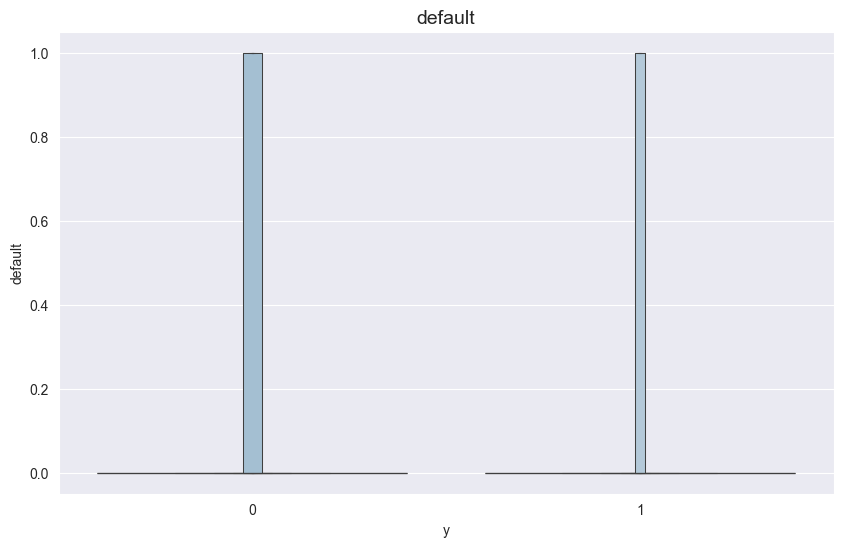

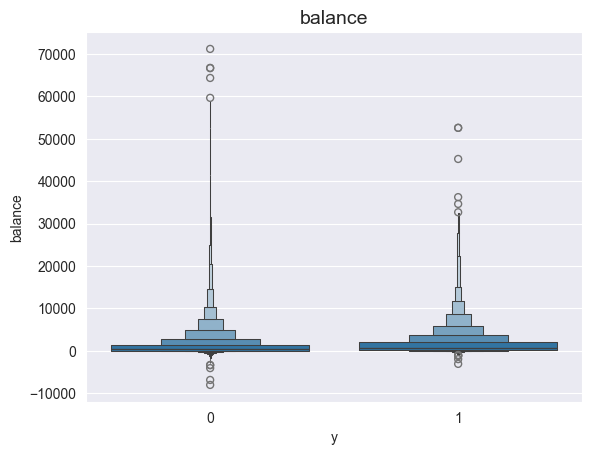

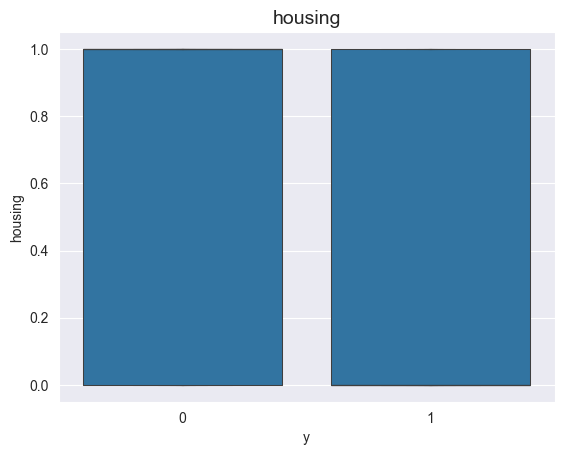

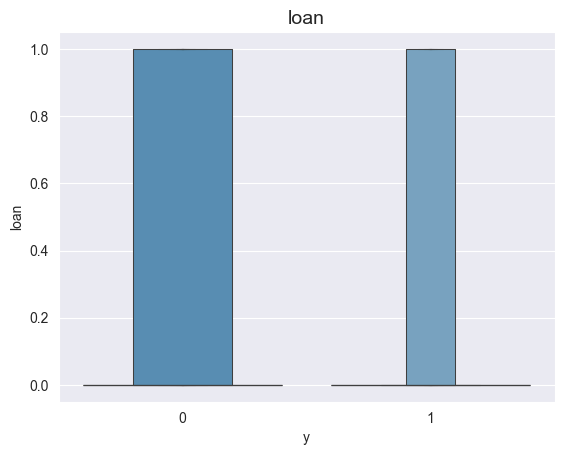

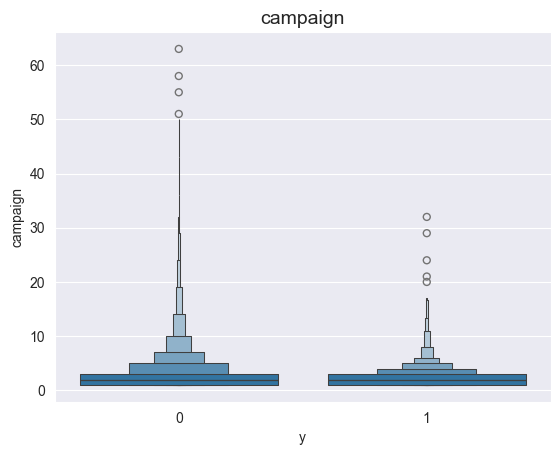

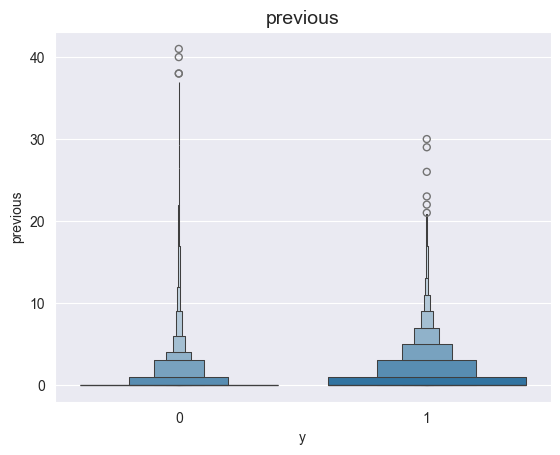

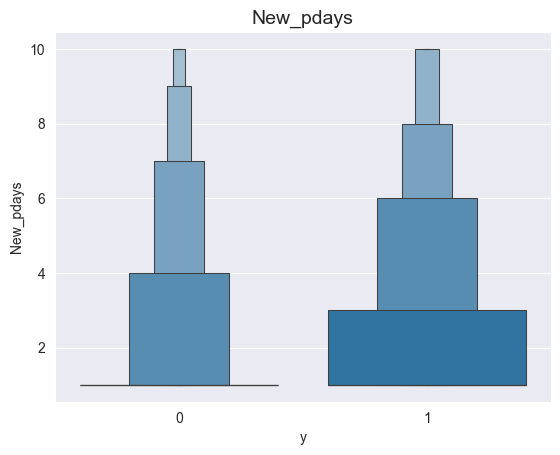

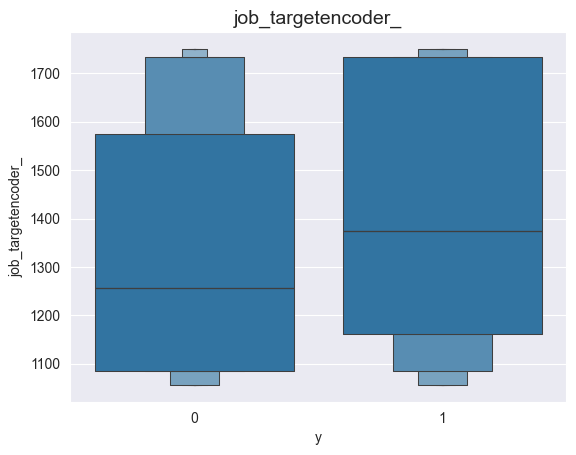

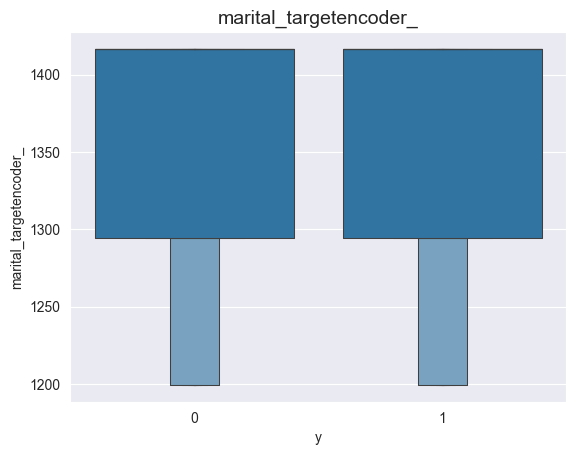

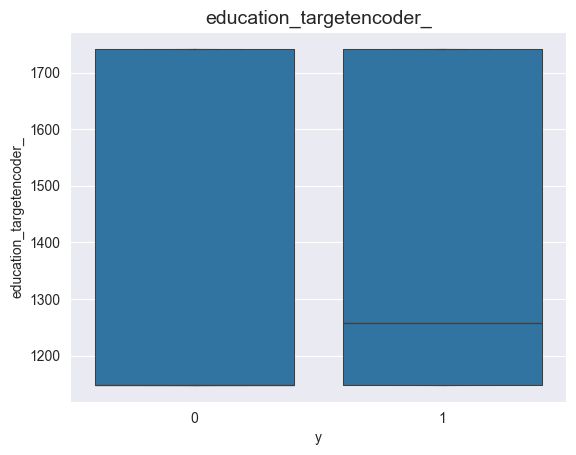

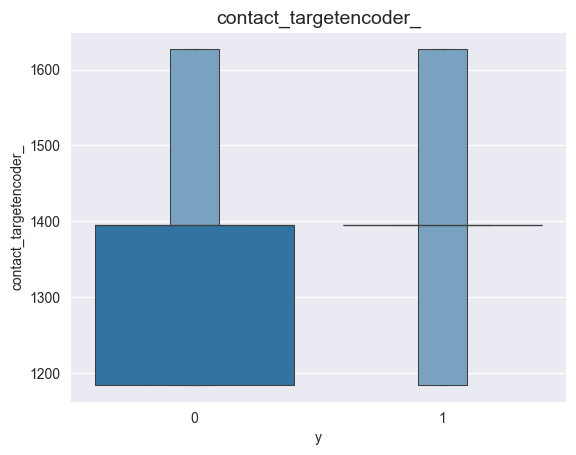

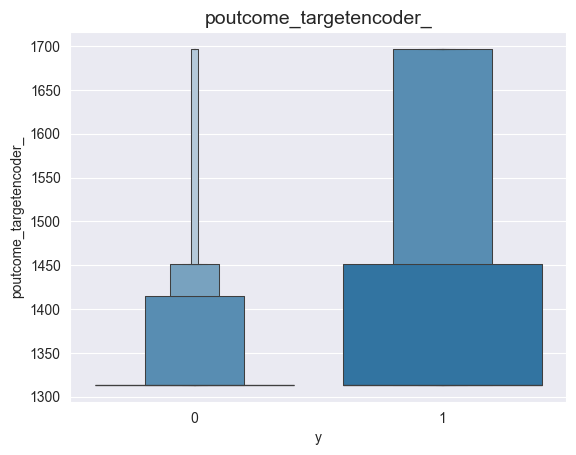

In [49]:
lst_features = ['default', 'balance',
       'housing', 'loan', 'campaign',
       'previous',  'New_pdays', 'job_targetencoder_',
       'marital_targetencoder_', 'education_targetencoder_',
       'contact_targetencoder_', 'poutcome_targetencoder_']

plt.figure(figsize=(10, 6))

for Names in lst_features: 
    ax = sns.boxenplot(data=df_copied, x='y', y=Names)
    ax.set_title(Names, fontdict={'fontsize': 14})
    plt.show()

## Scale (normalize, standardize) 

In [52]:
df_copied.columns, df_copied.shape

(Index(['ID', 'y', 'default', 'balance', 'housing', 'loan', 'campaign',
        'previous', 'New_pdays', 'job_targetencoder_', 'marital_targetencoder_',
        'education_targetencoder_', 'contact_targetencoder_',
        'poutcome_targetencoder_'],
       dtype='object'),
 (45189, 14))

In [53]:
features_selected = df_copied[['ID', 
                               'y', 
                               'default', 
                               'balance', 
                               'housing', 
                               'loan', 
                               'campaign',
                               'previous', 
                               'New_pdays', 
                               'job_targetencoder_', 
                               'marital_targetencoder_',
                               'education_targetencoder_', 
                               'contact_targetencoder_',
                               'poutcome_targetencoder_'
                               ]]

In [55]:
features_selected = features_selected.set_index(['ID'])
features_selected.shape

(45189, 13)

In [56]:
features_selected['y'].value_counts(normalize=True)*100

y
0   88.318
1   11.682
Name: proportion, dtype: float64

In [57]:
lst_columns = features_selected.columns.tolist()
lst_columns.remove("y")
lst_columns

['default',
 'balance',
 'housing',
 'loan',
 'campaign',
 'previous',
 'New_pdays',
 'job_targetencoder_',
 'marital_targetencoder_',
 'education_targetencoder_',
 'contact_targetencoder_',
 'poutcome_targetencoder_']

In [58]:
sc = MinMaxScaler()
for  Names in lst_columns:  
    features_selected[Names] = sc.fit_transform(features_selected[[Names]])

In [84]:
features_selected.head()

,y,default,balance,housing,loan,campaign,previous,New_pdays,job_targetencoder_,marital_targetencoder_,education_targetencoder_,contact_targetencoder_,poutcome_targetencoder_
ID,,,,,,,,,,,,,
0,0,0.000,0.128,1.000,0.000,0.000,0.000,0.000,0.976,1.000,1.000,0.000,0.000
1,0,0.000,0.102,1.000,0.000,0.000,0.000,0.000,0.289,0.437,0.000,0.000,0.000
2,0,0.000,0.101,1.000,1.000,0.000,0.000,0.000,0.584,1.000,0.000,0.000,0.000
3,0,0.000,0.120,1.000,0.000,0.000,0.000,0.000,0.042,1.000,0.543,0.000,0.000
4,0,0.000,0.101,0.000,0.000,0.000,0.000,0.000,0.747,0.437,0.543,0.000,0.000


In [80]:
features_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45189 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   y                         45189 non-null  int64  
 1   default                   45189 non-null  float64
 2   balance                   45189 non-null  float64
 3   housing                   45189 non-null  float64
 4   loan                      45189 non-null  float64
 5   campaign                  45189 non-null  float64
 6   previous                  45189 non-null  float64
 7   New_pdays                 45189 non-null  float64
 8   job_targetencoder_        45189 non-null  float64
 9   marital_targetencoder_    45189 non-null  float64
 10  education_targetencoder_  45189 non-null  float64
 11  contact_targetencoder_    45189 non-null  float64
 12  poutcome_targetencoder_   45189 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 4.8 MB


## Partition

In [60]:
X = features_selected.drop(columns='y')
y = features_selected['y']

In [61]:
X.shape, y.shape

((45189, 12), (45189,))

In [62]:
random_ = 2023
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state=random_, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33891, 12), (11298, 12), (33891,), (11298,))

In [ ]:
X_train.head(2), X_test.head(2), y_train.head(2), y_test.head(2)

(       default  balance  housing  loan  campaign  previous  New_pdays  \
 ID                                                                      
 31295    0.000    0.162    0.000 0.000     0.000     0.000      0.000   
 15309    0.000    0.131    0.000 0.000     0.016     0.000      0.000   
 36664    0.000    0.118    1.000 0.000     0.065     0.000      0.000   
 42474    0.000    0.157    0.000 0.000     0.000     0.024      0.556   
 41478    0.000    0.105    0.000 0.000     0.016     0.000      0.000   
 
        job_targetencoder_  marital_targetencoder_  education_targetencoder_  \
 ID                                                                            
 31295               0.976                   0.437                     1.000   
 15309               0.289                   0.437                     0.000   
 36664               0.042                   1.000                     0.000   
 42474               0.976                   0.437                     1.000   


# Train, Tune and Evaluate

## Model Training

In [63]:
clf = lgb.LGBMClassifier(n_jobs=-1,random_state=random_)

model = clf.fit(X_train,y_train)

predicted = model.predict(X_test)

y_pred = clf.predict_proba(X_test)[:,1]

y_pred_train = clf.predict_proba(X_train)[:,1]

probabilities = clf.predict_proba(X_test)[:,1]

fp, tp, th = roc_curve(y_test, predicted)

predictions = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, predicted)

[LightGBM] [Info] Number of positive: 3959, number of negative: 29932
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 33891, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116816 -> initscore=-2.022937
[LightGBM] [Info] Start training from score -2.022937


## Validation Metrics

In [64]:
print("accuracy of testing data.: {:.4f}".format(roc_auc_score(y_test, y_pred)))
print("accuracy of training data: {:.4f}".format(roc_auc_score(y_train, y_pred_train)))
# The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.
print('Training accuracy........: {:.4f}'.format(clf.score(X_train, y_train)))
print('Testing accuracy.........: {:.4f}'.format(clf.score(X_test, y_test)))

print('accuracy score...........: {:.4f}'.format(accuracy_score(y_test, predicted)))
print('precision score..........: {:.4f}'.format(precision_score(y_test, predicted)))
print('recall score.............: {:.4f}'.format(recall_score(y_test, predicted)))
print('f1 score.................: {:.4f}'.format(f1_score(y_test, predicted, average='weighted')))
print('auc......................: {:.4f}'.format(auc(fp, tp)))

accuracy of testing data.: 0.7544
accuracy of training data: 0.8301
Training accuracy........: 0.8976
Testing accuracy.........: 0.8945
accuracy score...........: 0.8945
precision score..........: 0.6749
recall score.............: 0.1871
f1 score.................: 0.8671
auc......................: 0.5876


In [65]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9978
           1       0.67      0.19      0.29      1320

    accuracy                           0.89     11298
   macro avg       0.79      0.59      0.62     11298
weighted avg       0.88      0.89      0.87     11298



In [66]:
#confusion matrix
print(metrics.confusion_matrix(y_test, predicted))
#                           Valor Predito
#                        Negativo - Positivo
# Valor Atual - Negativo [   TN   -   FP   ]
# Valor Atual - Positivo [   FN   -   TP   ]

[[9859  119]
 [1073  247]]


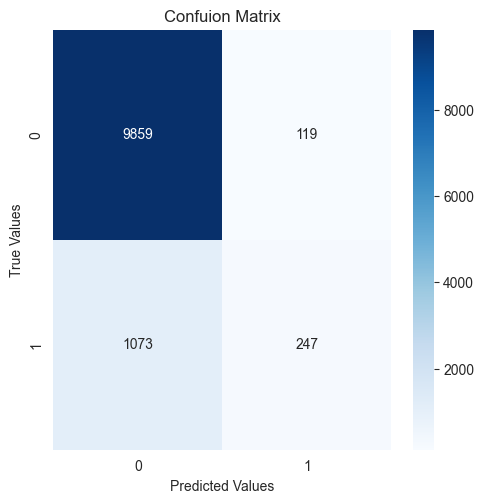

In [67]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
plt.title('Confuion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Area under curve :  0.754390378529735 



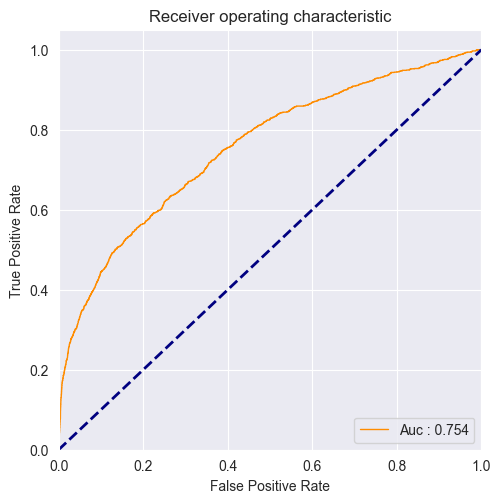

In [68]:
#roc_auc_score
model_roc_auc = roc_auc_score(y_test, probabilities)
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test ,probabilities)

plt.figure(figsize=(12,12))
plt.subplot(222)
plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## Feature Importance

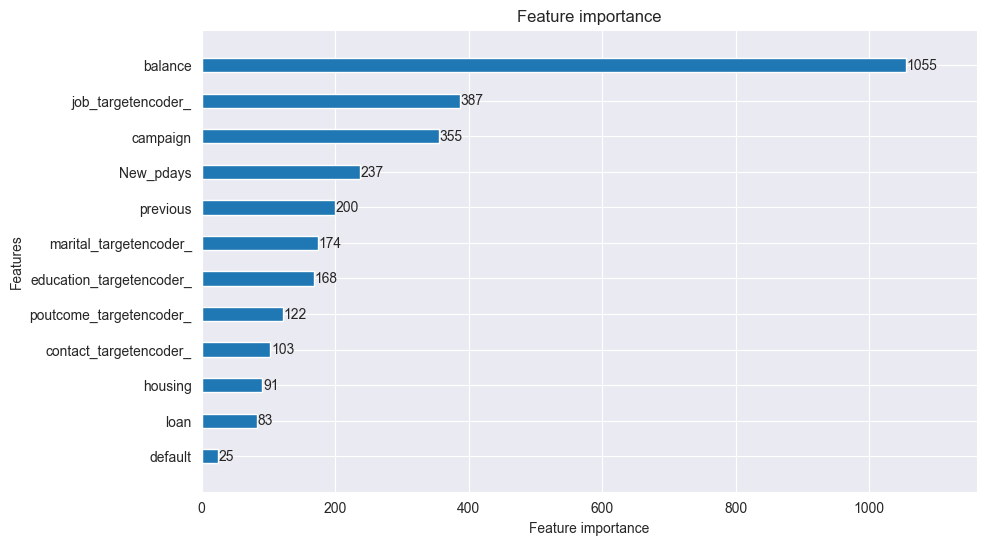

In [69]:
lgb.plot_importance(clf, height = 0.4, 
                         max_num_features = 30, 
                         figsize = (10,6))
plt.show()

In [70]:
coefficients = pd.DataFrame(clf.feature_importances_)
column_df = pd.DataFrame(X.columns)
coef_sumry = (pd.merge(coefficients, column_df, left_index= True, right_index=True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)
coef_sumry = coef_sumry[["features", "coefficients"]]
coef_sumry

,features,coefficients
1,balance,1055
7,job_targetencoder_,387
4,campaign,355
6,New_pdays,237
5,previous,200
8,marital_targetencoder_,174
9,education_targetencoder_,168
11,poutcome_targetencoder_,122
10,contact_targetencoder_,103
2,housing,91


In [71]:
features_importances = pd.DataFrame(columns=['feature_name','feature_importance'])
features_importances['feature_name'] = clf.feature_name_
features_importances['feature_importance'] = clf.feature_importances_
features_importances.sort_values('feature_importance', ascending=False)

,feature_name,feature_importance
1,balance,1055
7,job_targetencoder_,387
4,campaign,355
6,New_pdays,237
5,previous,200
8,marital_targetencoder_,174
9,education_targetencoder_,168
11,poutcome_targetencoder_,122
10,contact_targetencoder_,103
2,housing,91


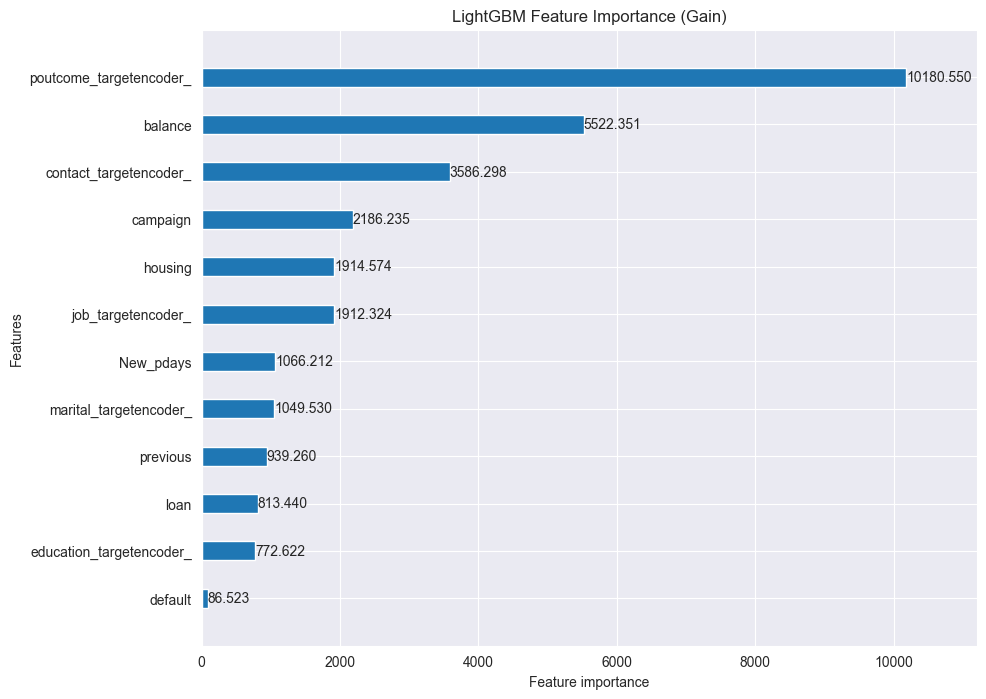

In [72]:
lgb.plot_importance(clf, height = 0.4, importance_type="gain",
                         max_num_features = 30, title="LightGBM Feature Importance (Gain)",
                         figsize = (10, 8))
plt.show()

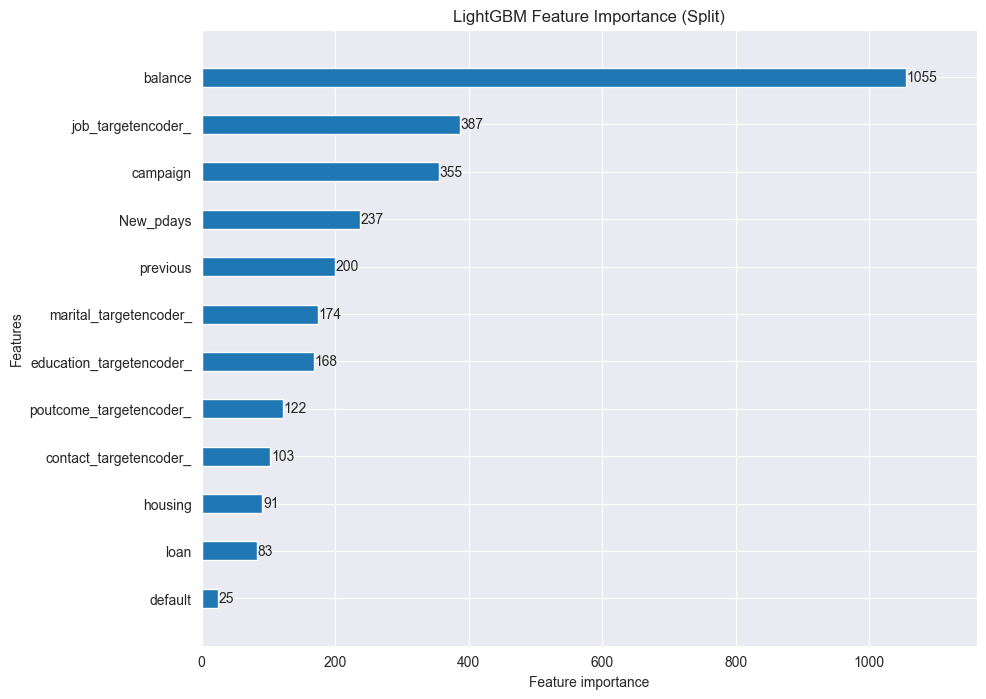

In [73]:
lgb.plot_importance(clf, height = 0.4, importance_type="split",
                         max_num_features = 30, title="LightGBM Feature Importance (Split)",
                         figsize = (10, 8))
plt.show()

## Using LOFO

In [74]:
sample_df = features_selected.sample(frac=0.03, random_state=0)
sample_df.sort_values("y", inplace=True) # Sort by time for time split validation
sample_df.shape

(1356, 13)

In [75]:
dataset = Dataset(df=sample_df, target="y", features=[col for col in sample_df.columns if col != "y"])

In [76]:
lofo_imp = LOFOImportance(dataset, model=clf, scoring="roc_auc")

In [77]:
warnings.filterwarnings('ignore')
importance_df = lofo_imp.get_importance()
importance_df.head()

[LightGBM] [Info] Number of positive: 119, number of negative: 898
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 1017, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117011 -> initscore=-2.021047
[LightGBM] [Info] Start training from score -2.021047
[LightGBM] [Info] Number of positive: 119, number of negative: 898
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 1017, number of used features: 11
[LightGBM] [Info] [binary:Boos

  0%|          | 0/12 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 119, number of negative: 898
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 1017, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117011 -> initscore=-2.021047
[LightGBM] [Info] Start training from score -2.021047
[LightGBM] [Info] Number of positive: 119, number of negative: 898
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 1017, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117011 -> initscore=-2.021047
[LightGBM] [In

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
1,poutcome_targetencoder_,0.020,0.017,-0.005,0.041,0.021,0.021
7,contact_targetencoder_,0.009,0.018,0.027,-0.020,0.013,0.017
4,education_targetencoder_,0.006,0.014,0.023,-0.016,0.010,0.006
0,loan,0.005,0.014,-0.015,-0.003,0.022,0.014
2,job_targetencoder_,0.003,0.007,-0.002,-0.002,0.000,0.014


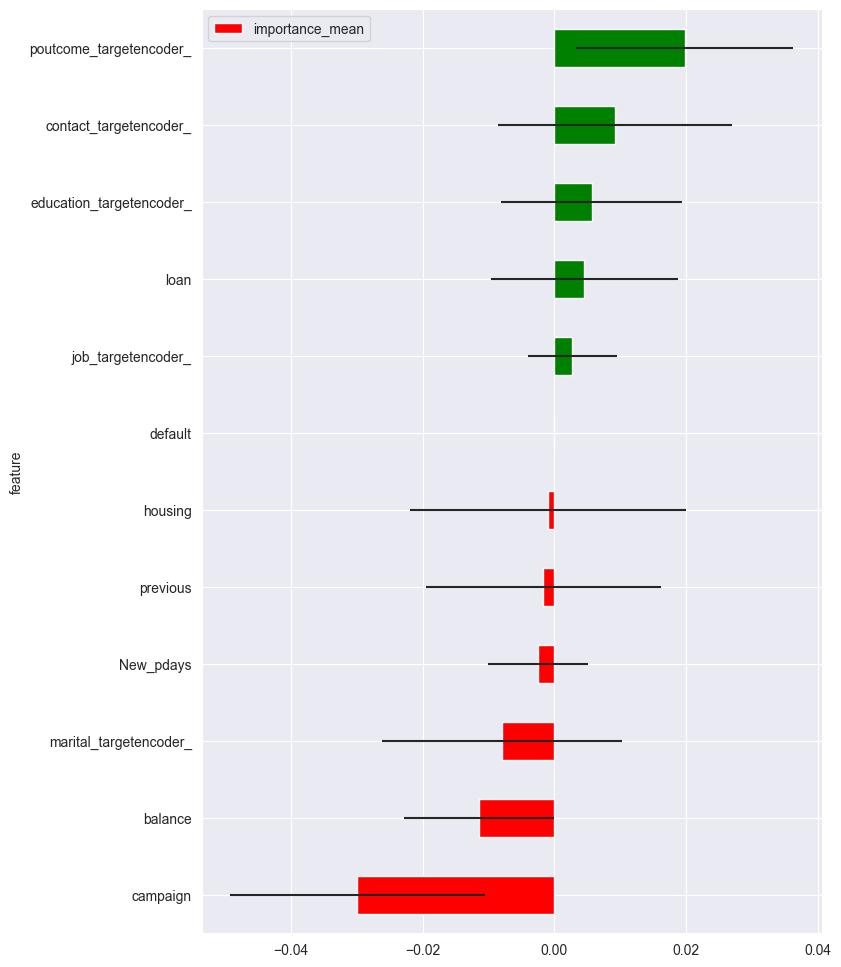

In [79]:
plot_importance(importance_df, figsize=(8,12))

## Cross Validation

### k-fold Cross-Validation

In [ ]:
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train, test in kf.split(X):
    print("%s %s" % (X_train, y_train))      

In [97]:
train_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring='f1')
train_scores

[LightGBM] [Info] Number of positive: 3167, number of negative: 23945
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 27112, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116812 -> initscore=-2.022975
[LightGBM] [Info] Start training from score -2.022975
[LightGBM] [Info] Number of positive: 3167, number of negative: 23946
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 27113, number of used features: 12
[LightGBM] [Info] [bin

array([0.25722832, 0.23662551, 0.24572004, 0.30574489, 0.26467662])

In [98]:
# As we can see that the performance of the model on test data is same as training data. So, we can conclude that there is no overfitting and underfitting.
np.mean(train_scores)

0.2619990749357787